In [2]:
cvae_40 = CVAE(INPUT_DIM,HIDDEN_DIM,LATENT_DIM[0],N_CLASSES)
cvae_40.load_state_dict(torch.load("mnist_cvae/cvae_40.pt"))
cvae_40.eval()

cvae_50 = CVAE(INPUT_DIM,HIDDEN_DIM,LATENT_DIM[1],N_CLASSES)
cvae_50.load_state_dict(torch.load("mnist_cvae/cvae_50.pt"))
cvae_50.eval()

cvae_60 = CVAE(INPUT_DIM,HIDDEN_DIM,LATENT_DIM[2],N_CLASSES)
cvae_60.load_state_dict(torch.load("mnist_cvae/cvae_60.pt"))
cvae_60.eval()

cvae_70 = CVAE(INPUT_DIM,HIDDEN_DIM,LATENT_DIM[3],N_CLASSES)
cvae_70.load_state_dict(torch.load("mnist_cvae/cvae_70.pt"))
cvae_70.eval()

cvae_80 = CVAE(INPUT_DIM,HIDDEN_DIM,LATENT_DIM[4],N_CLASSES)
cvae_80.load_state_dict(torch.load("mnist_cvae/cvae_80.pt"))
cvae_80.eval()

cvae_100 = CVAE(INPUT_DIM,HIDDEN_DIM,LATENT_DIM[5],N_CLASSES)
cvae_100.load_state_dict(torch.load("mnist_cvae/cvae_100.pt"))
cvae_100.eval()

cvae_128 = CVAE(INPUT_DIM,HIDDEN_DIM,LATENT_DIM[6],N_CLASSES)
cvae_128.load_state_dict(torch.load("mnist_cvae/cvae_128.pt"))
cvae_128.eval()

cvae_140 = CVAE(INPUT_DIM,HIDDEN_DIM,LATENT_DIM[7],N_CLASSES)
cvae_140.load_state_dict(torch.load("mnist_cvae/cvae_140.pt"))
cvae_140.eval()

cvae_160 = CVAE(INPUT_DIM,HIDDEN_DIM,LATENT_DIM[8],N_CLASSES)
cvae_160.load_state_dict(torch.load("mnist_cvae/cvae_160.pt"))
cvae_160.eval()

cvae_200 = CVAE(INPUT_DIM,HIDDEN_DIM,LATENT_DIM[9],N_CLASSES)
cvae_200.load_state_dict(torch.load("mnist_cvae/cvae_200.pt"))
cvae_200.eval()

models = [cvae_40,cvae_50,cvae_60,cvae_70,cvae_80,cvae_100,cvae_128,cvae_140,cvae_160,cvae_200]

classifier_model = nn.Sequential(nn.Linear(INPUT_DIM, HIDDEN_DIMS[0]),
                      nn.ReLU(),
                      nn.Linear(HIDDEN_DIMS[0], HIDDEN_DIMS[1]),
                      nn.ReLU(),
                      nn.Linear(HIDDEN_DIMS[1], N_CLASSES),
                      nn.LogSoftmax(dim=1))

classifier = classifier_model
classifier.load_state_dict(torch.load("mnist_classif/mnist_classif.pt"))
classifier.eval()

classifier1 = classifier_model
classifier1.load_state_dict(torch.load("mnist_classif/mnist_classif2.pt"))
classifier1.eval()

classifier2 = classifier_model
classifier2.load_state_dict(torch.load("mnist_classif/mnist_classif2.pt"))
classifier2.eval()

classifiers = [classifier,classifier1,classifier2]

In [3]:
#Functions 
def idx2onehot(idx, n=N_CLASSES):

    assert idx.shape[1] == 1
    assert torch.max(idx).item() < n

    onehot = torch.zeros(idx.size(0), n)
    onehot.scatter_(1, idx.data, 1)

    return onehot
def latent_vector(c1=0,c2=0,dim=LATENT_DIM[0],ax1=0,ax2=1):
    z = torch.zeros(1, dim)
    z[0][ax1]= c1
    z[0][ax2]= c2

    return z 

def onehotmixer(a=0,b=0,mix=False):
    y = torch.zeros(1, 1).to(dtype=torch.long)
    y = idx2onehot(y)
    y[0][0] = 0
    y[0][a] = 1
    if mix : 
        y[0][b] = 1

    return y

def list_print(list1,list2=[]) : 
    average = np.mean(list1)
    if len(list2)>0 : 
        for i in range(len(list1)):
            sys.stdout.write("pred : "+str(list2[i])+" : "+"{:.2f}".format(list1[i])+ " | ")
    else :
        for data in list1:
            sys.stdout.write("{:.2f}".format(data)+ " | ")
        sys.stdout.write(" av = "+"{:.2f}".format(average))

def classify(img,second=False): 
    probab = class_proba(classifier,img)
    pred_label = probab.index(max(probab))
    maximum = max(probab)
    if second : 
        probab.remove(max(probab))
        return pred_label, maximum , max(probab)
    else :
        return pred_label, maximum 

def class_proba(c_model,img):
    with torch.no_grad():
        logps = c_model(img.view(1,INPUT_DIM))        
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    return probab

def classify_best(img): 
    probabs = [class_proba(model,img) for model in classifiers]
    probabs = np.sum(probabs,axis=1)
    probabs = probabs/len(classifiers)
    return probabs


In [4]:
def representant(number,model,latent_dim):
    z = torch.zeros((1,latent_dim))
    y = onehotmixer(number)
    z = torch.cat((z, y), dim=1)
    with torch.no_grad():
        reconstructed_img = model.decoder(z)   
    img = reconstructed_img.view(28, 28).data 

    return img


Generation of MNIST represants according to classifier with latent dim = 40


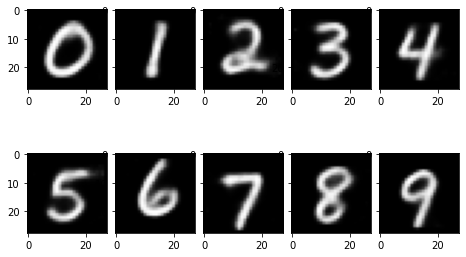

Generation of MNIST represants according to classifier with latent dim = 50


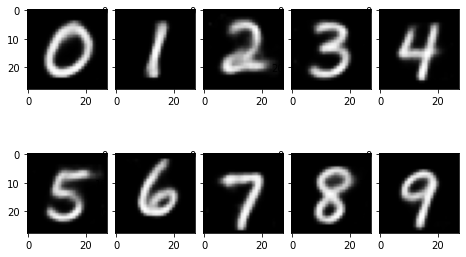

Generation of MNIST represants according to classifier with latent dim = 60


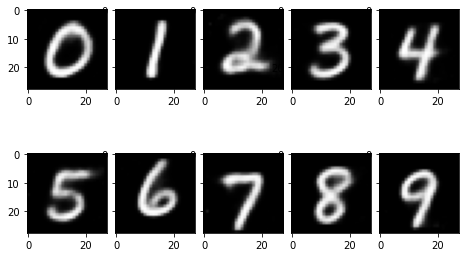

Generation of MNIST represants according to classifier with latent dim = 70


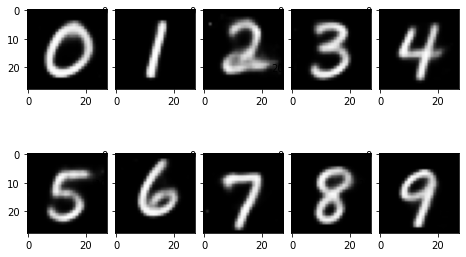

Generation of MNIST represants according to classifier with latent dim = 80


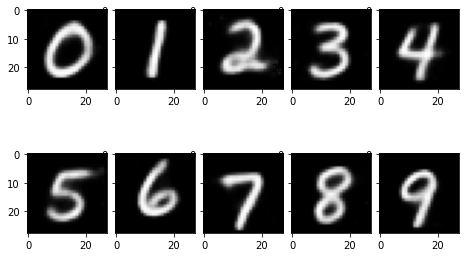

Generation of MNIST represants according to classifier with latent dim = 100


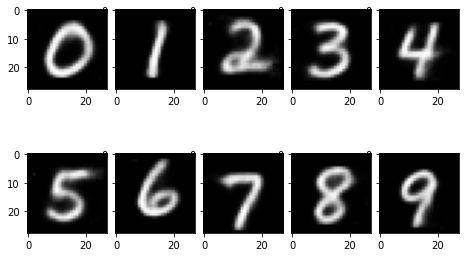

Generation of MNIST represants according to classifier with latent dim = 128


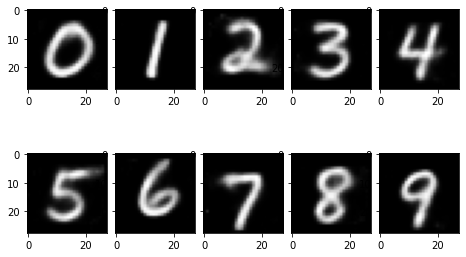

Generation of MNIST represants according to classifier with latent dim = 140


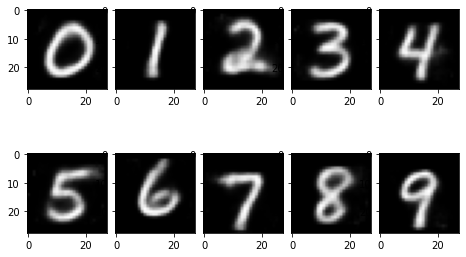

Generation of MNIST represants according to classifier with latent dim = 160


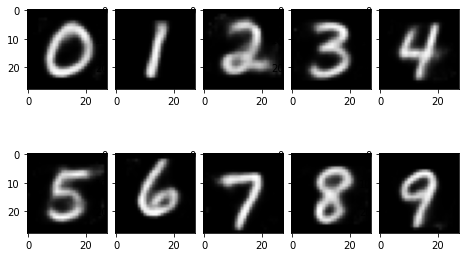

Generation of MNIST represants according to classifier with latent dim = 200


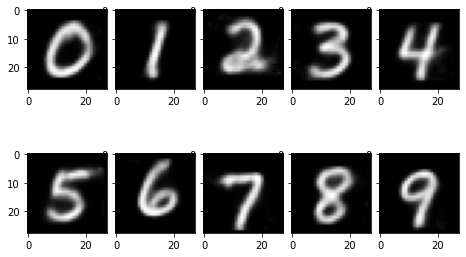

In [5]:
for i in range(len(models)) : 
    representants = []
    for digit in range(N_CLASSES):
        img= representant(digit,models[i],LATENT_DIM[i])
        representants.append(img)
        plt.subplot(2, N_CLASSES/2, 1 + digit)
        plt.imshow(img, cmap = plt.cm.gray)
    print("Generation of MNIST represants according to classifier with latent dim = "+str(LATENT_DIM[i]))
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0)
    plt.show()

In [6]:
def ENC_DEC_gen(img,Cp,model):

    img = img.view(-1, 28 * 28)

    Cp = onehotmixer(Cp)

    x = torch.cat((img, Cp), dim=1)

    # encode
    with torch.no_grad():
        z_mu, z_var = model.encoder(x)

    # sample from the distribution having latent parameters z_mu, z_var
    # reparameterize
    std = torch.exp(z_var / 2)
    eps = torch.randn_like(std)
    x_sample = eps.mul(std).add_(z_mu)

    z = torch.cat((x_sample, Cp), dim=1)

    # decode
    with torch.no_grad():
        generated_x = model.decoder(z)

    img = generated_x.view(28, 28).data

    return img

In [7]:
def encode(x,y,model,z=False): 
    x = x.view(-1, 28 * 28)

    # convert y into one-hot encoding
    y = onehotmixer(y)
    x = torch.cat((x, y), dim=1)

    # encode
    with torch.no_grad():
        z_mu, z_var = model.encoder(x)
    if z : 
        std = torch.exp(z_var / 2)
        eps = torch.randn_like(std)
        return eps.mul(std).add_(z_mu)
    else :    
        return z_mu, z_var

In [8]:
def ctf_gen(number,min_p=0.5):
    result_p = []
    result_ctf = []

    for Cp in range(1,N_CLASSES): 
        if(Cp != number):
            probas = []
            ctfs = []
            for i in range(len(models)) : 
                img = representant(number,models[i],LATENT_DIM[i])
                ctf_img = ENC_DEC_gen(img,Cp,models[i])
                label, proba1, proba2 = classify(ctf_img,True)
               
                if proba1 > min_p and label == number :              
                    mu, std = encode(ctf_img,Cp,models[i])
                    probas.append(+ proba1-0.2* torch.sum(1 + std - mu.pow(2) - std.exp()))      
                    ctfs.append(ctf_img)
            if len(probas)>0:       
                index = probas.index(min(probas))
                result_p.append(probas[index])                  # We append to our result list
                result_ctf.append(ctfs[index])                 # the best ctf according to our metric 
    if len(result_p)>0 :
        return result_ctf[result_p.index(min(result_p))] 
    else:
        return representants[0]

0.5


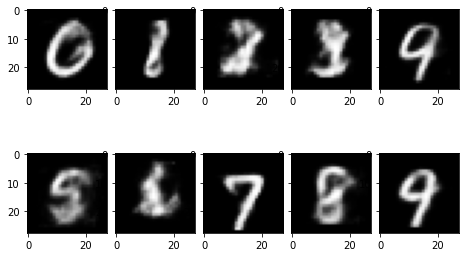

0.5444444444444444


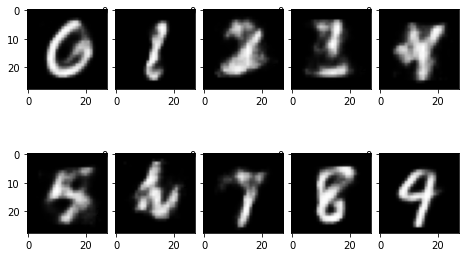

0.5888888888888889


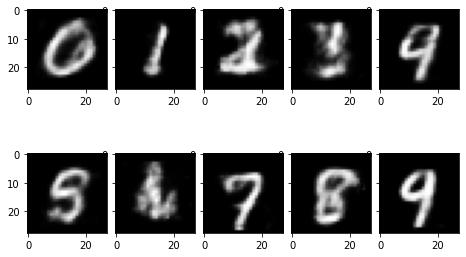

0.6333333333333333


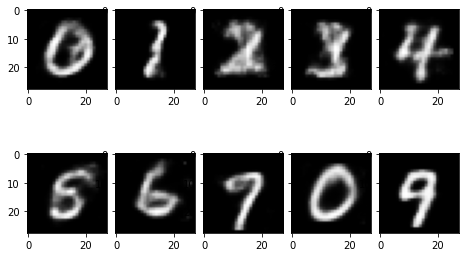

0.6777777777777778


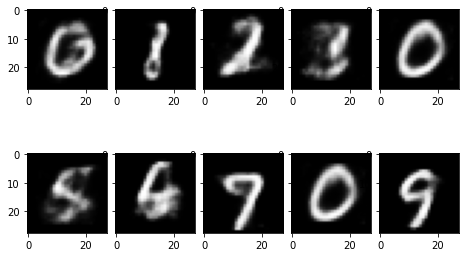

0.7222222222222222


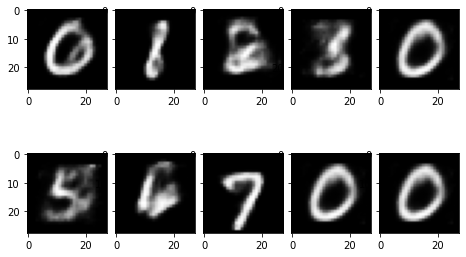

0.7666666666666666


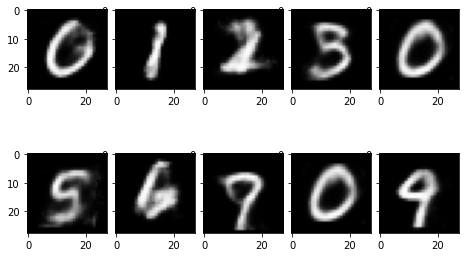

0.8111111111111111


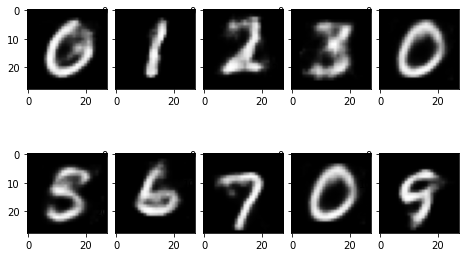

0.8555555555555556


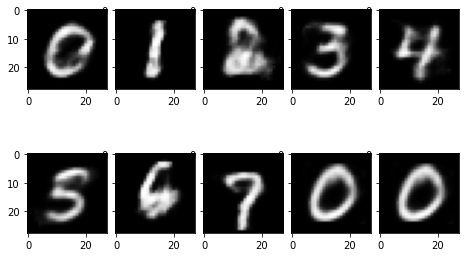

0.9


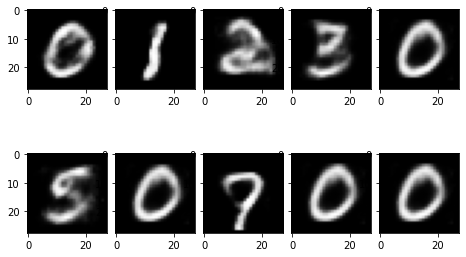

In [9]:
for min_p in np.linspace(0.5,0.9,10):
    print(min_p)
    for number in range(N_CLASSES):
        img = ctf_gen(number,min_p)
        plt.subplot(2, N_CLASSES/2, 1 + number)
        plt.imshow(img, cmap = plt.cm.gray)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0)
    plt.show()

In [10]:
def ctf_gen(number,min_p=0.5):

    result_p = []
    result_ctf = []

    for Cp in range(1,N_CLASSES): 
        if(Cp != number):
            probas = []
            ctfs = []
            for i in range(len(models)) : 
                img = representant(number,models[i],LATENT_DIM[i])
                ctf_img = ENC_DEC_gen(img,Cp,models[i])
                label, proba1, proba2 = classify(ctf_img,True)
                mu, std = encode(ctf_img,Cp,models[i])
                l = (-10 * torch.sum(1 + std - mu.pow(2) - std.exp()))    
               
                if l < 800*min_p and label == number :              
                    probas.append(-proba1)
                    ctfs.append(ctf_img)
            if len(probas)>0:       
                index = probas.index(min(probas))
                result_p.append(probas[index])                  # We append to our result list
                result_ctf.append(ctfs[index])                 # the best ctf according to our metric 
    if len(result_p)>0 :
        return result_ctf[result_p.index(min(result_p))] 
    else:
        return representants[0]

0.5


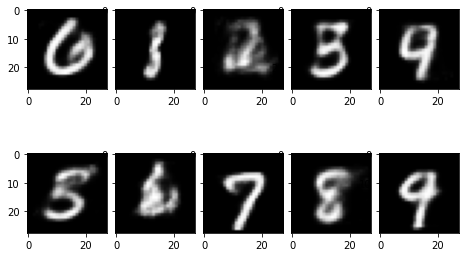

0.5444444444444444


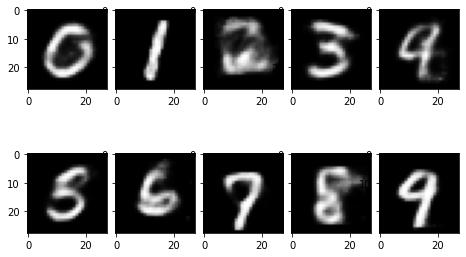

0.5888888888888889


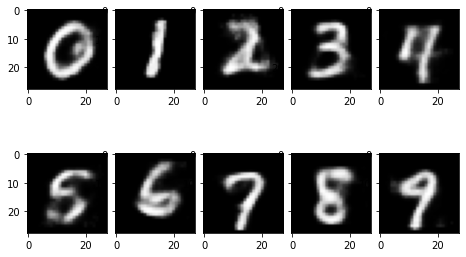

0.6333333333333333


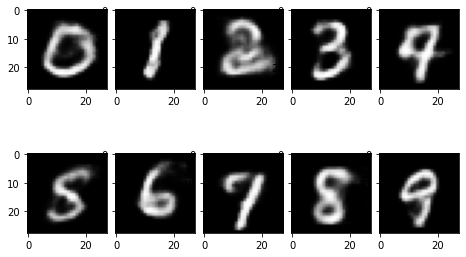

0.6777777777777778


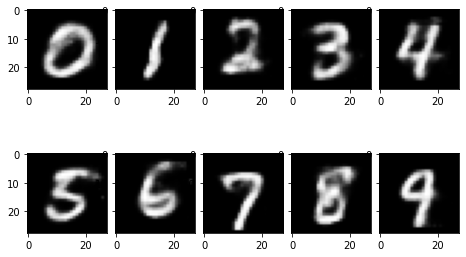

0.7222222222222222


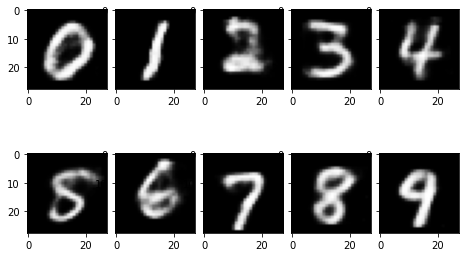

0.7666666666666666


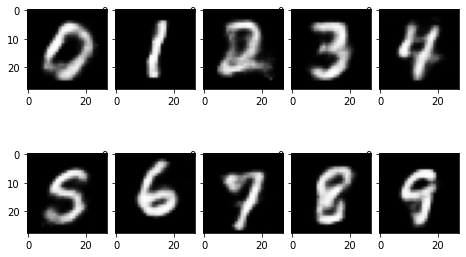

0.8111111111111111


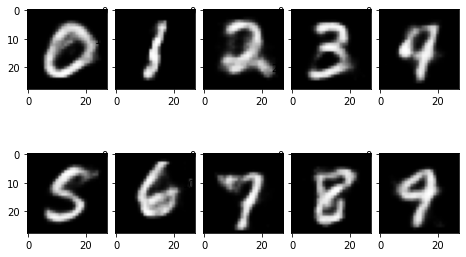

0.8555555555555556


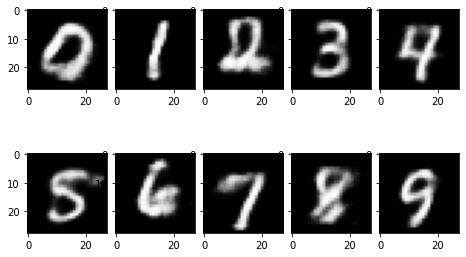

0.9


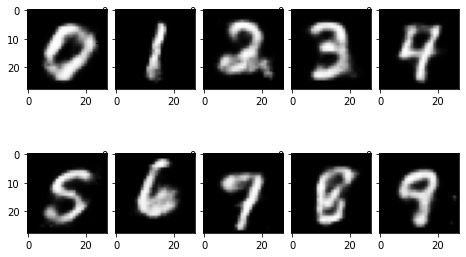

In [11]:
for min_p in np.linspace(0.5,0.9,10):
    print(min_p)
    for number in range(N_CLASSES):
        img = ctf_gen(number,min_p)
        plt.subplot(2, N_CLASSES/2, 1 + number)
        plt.imshow(img, cmap = plt.cm.gray)
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.1, hspace=0)
    plt.show()